In [1]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [19]:
import json
with open('s_chi_e-r_2000_scale_n.json') as json_file:
     data = json.load(json_file)
N = data['N'];
est_N_crit = data['est_N_crit'];
maxChi = data['maxChi'];
size_list = np.array(data['size_list']);
av_S = data['av_S'];
av_chi = data['av_chi'];

<Figure size 432x288 with 0 Axes>

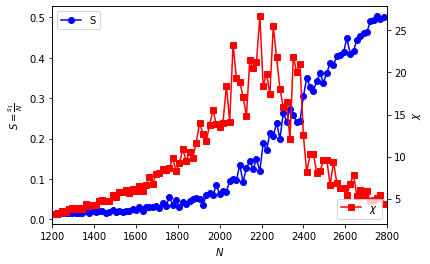

<Figure size 432x288 with 0 Axes>

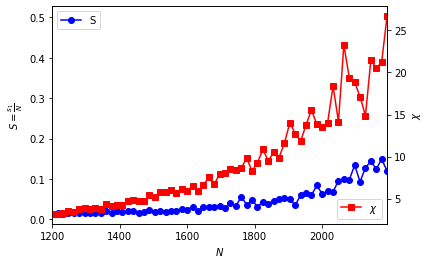

<Figure size 432x288 with 0 Axes>

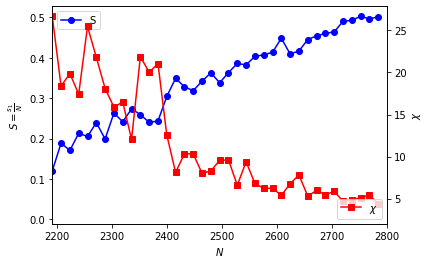

In [21]:
delta = 800 #800, 800, 1000
mult = 1.0;
plt.clf(); 
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
plt.xlim((N-delta, N+delta))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
plt.xlim((N-delta, est_N_crit))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
plt.xlim((est_N_crit, N+delta))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [26]:
print(est_N_crit)
print(N)
loc_N_crit = np.where(size_list == est_N_crit)[0][0] #find location of the estimated N_c in the list of size_list
print(loc_N_crit)
print(av_S[loc_N_crit])
print(av_chi[loc_N_crit])

#setting the interval for the neighborhood around N_c
begInt = loc_N_crit - 20
endInt = loc_N_crit + 20

2192
2000
62
0.11998175182481752
26.6946132622197


<Figure size 432x288 with 0 Axes>

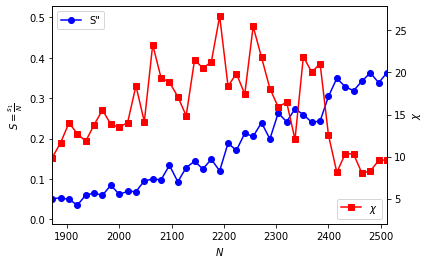

In [27]:
#testing the interval
plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S"', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
plt.xlim((size_list[begInt], size_list[endInt]))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [28]:
#setting the interval
size_nei = size_list[begInt:endInt+1]
s_nei = av_S[begInt:endInt+1]

In [29]:
def getRMSE(fitted, x, y):
    return math.sqrt(np.mean((y- fitted(x)) ** 2))

In [30]:
est_S = {} #storing the estimated values by each model
err_model = [] #storing the error for each model
degRange = range(2,6)
size_iter = np.linspace(size_nei[0], size_nei[len(size_nei)-1], 1000)
for deg in degRange:
  #fitting the linear model
  model = np.poly1d(np.polyfit(size_nei, s_nei, deg))

  #getting the estimated results
  est_S[deg] = model(size_iter)

  #getting the RMSE for each model
  err_model.append(getRMSE(model, size_nei, s_nei))

<Figure size 432x288 with 0 Axes>

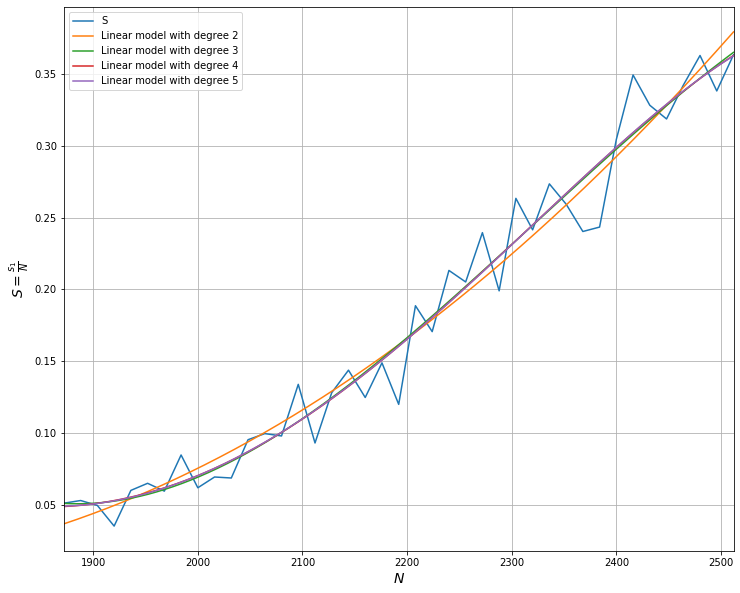

In [31]:
mult = 1.0
plt.clf()
plt.figure(figsize = (12, 10))
plt.xlabel(xlabel = r'$N$', fontsize = 14)
plt.ylabel(ylabel = r'$S=\frac{s_1}{N}$', fontsize = 14)
plt.plot(size_nei,s_nei,'-',label = 'S')
plt.xlim((size_nei[0], size_nei[len(size_nei)-1]))
for deg in degRange:
    plt.plot(size_iter, est_S[deg], label = "Linear model with degree " + str(deg))
plt.legend(loc = 0)
plt.grid()
plt.show()

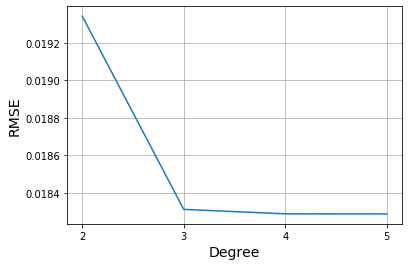

In [32]:
mult = 1.0
plt.clf()
plt.xlabel(xlabel = r'Degree', fontsize = 14)
plt.xticks(degRange)
plt.ylabel(ylabel = r'RMSE', fontsize = 14)
plt.plot(list(degRange), err_model)
plt.grid()
plt.show()

In [33]:
err_model[len(err_model)-1]

0.018287133042213514

In [34]:
import pandas as pd
df = pd.DataFrame({'Linear Degree' : degRange, 'Error' : err_model})    
df

,Linear Degree,Error
0,2,0.019343
1,3,0.018311
2,4,0.018288
3,5,0.018287


In [35]:
from scipy.optimize import curve_fit
#Source: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

In [36]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [37]:
pars, cov = curve_fit(f=power_law, xdata=size_nei, ydata=s_nei, p0=[0, 0], bounds=(-np.inf, np.inf), maxfev = 1500)
pow_model_est = power_law(size_iter, *pars)

In [38]:
pars

array([2.97126354e-24, 6.80053988e+00])

<Figure size 432x288 with 0 Axes>

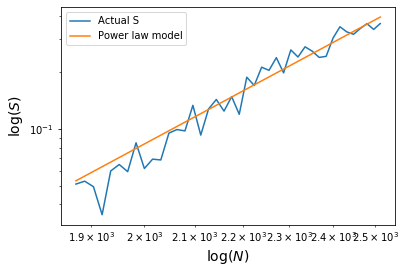

In [39]:
plt.clf()
fig,ax = plt.subplots()

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(xlabel = r'$\log(N)$', fontsize = 14)
plt.ylabel(ylabel = r'$\log(S)$', fontsize = 14)

# Set the axis limits
plt.plot(size_nei, s_nei, label = 'Actual S')
plt.plot(size_iter, pow_model_est, label = 'Power law model')
plt.legend(loc = 0)
plt.show()

In [40]:
math.sqrt(np.mean((s_nei- power_law(size_nei, *pars)) ** 2))

0.0217541728259409